In [688]:
import pandas as pd
import matplotlib.pyplot as plt

In [689]:
#watching data
cancer_data = pd.read_csv("lung cancer data.csv")
cancer_data.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [690]:
#Changing 1,2 to YES or NO
cancer_data.replace(1, "NO", inplace = True)
cancer_data.replace(2, "YES", inplace = True)
cancer_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,NO,NO,NO,YES,YES,YES,NO,NO,YES,YES,YES,YES,NO,YES
305,M,70,YES,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,NO,YES,YES
306,M,58,YES,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,NO,YES,YES
307,M,67,YES,NO,YES,NO,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES


In [691]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    object
 3   YELLOW_FINGERS         309 non-null    object
 4   ANXIETY                309 non-null    object
 5   PEER_PRESSURE          309 non-null    object
 6   CHRONIC DISEASE        309 non-null    object
 7   FATIGUE                309 non-null    object
 8   ALLERGY                309 non-null    object
 9   WHEEZING               309 non-null    object
 10  ALCOHOL CONSUMING      309 non-null    object
 11  COUGHING               309 non-null    object
 12  SHORTNESS OF BREATH    309 non-null    object
 13  SWALLOWING DIFFICULTY  309 non-null    object
 14  CHEST PAIN             309 non-null    object
 15  LUNG_CANCER            

In [692]:
#checking nulls
cancer_data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [693]:
#Smoke and Alcohol Inpact
cancer_yes = cancer_data[cancer_data['LUNG_CANCER'] == 'YES']
result = cancer_yes.groupby(['SMOKING', 'ALCOHOL CONSUMING']).size().reset_index(name='PEOPLE SICK COUNT')

cancer_no = cancer_data[cancer_data['LUNG_CANCER'] == 'NO']
result2 = cancer_no.groupby(['SMOKING', 'ALCOHOL CONSUMING']).size().reset_index(name='PEOPLE HEALTHY COUNT')

result_df = result.merge(result2, on=['SMOKING', 'ALCOHOL CONSUMING'], how='left')
result_df['TOTAL PEOPLE COUNT'] = result_df['PEOPLE SICK COUNT'].fillna(0) + result_df['PEOPLE HEALTHY COUNT'].fillna(0)

result_df

,SMOKING,ALCOHOL CONSUMING,PEOPLE SICK COUNT,PEOPLE HEALTHY COUNT,TOTAL PEOPLE COUNT
0,NO,NO,40,16,56
1,NO,YES,75,4,79
2,YES,NO,65,16,81
3,YES,YES,90,3,93


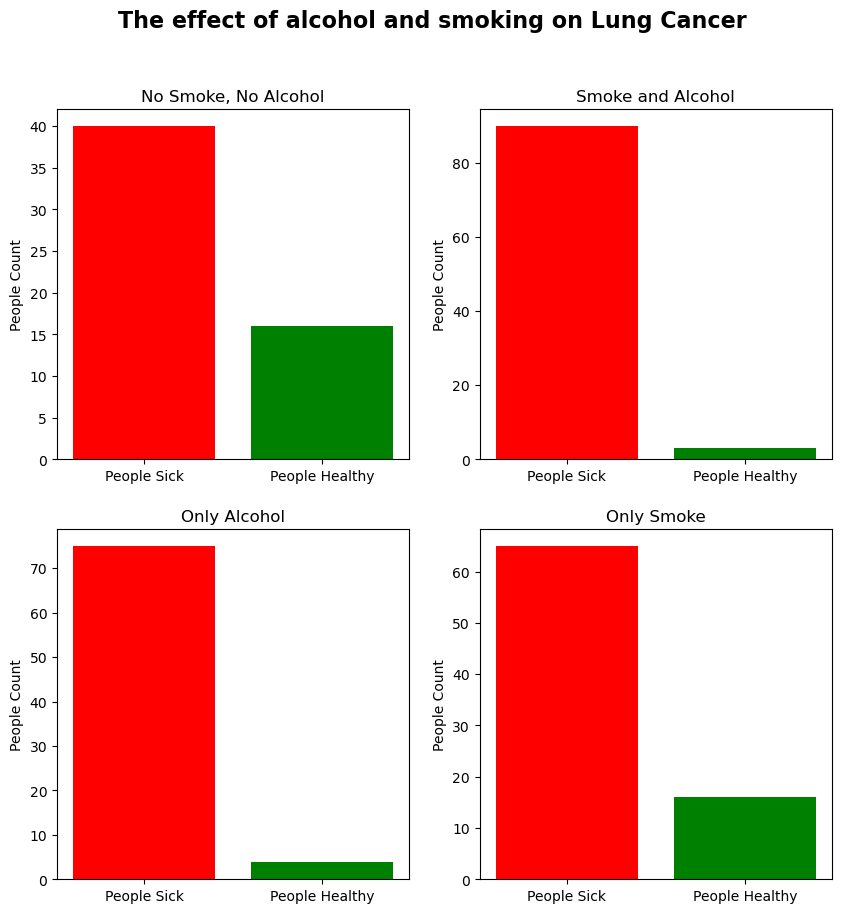

In [694]:
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,10)) 

bar = ax[0, 0].bar(['People Sick', 'People Healthy'], [result_df['PEOPLE SICK COUNT'][0], result_df['PEOPLE HEALTHY COUNT'][0]], color=['red','green'])

ax[0,0].set(title = "No Smoke, No Alcohol",
       ylabel = "People Count");

bar2 = ax[0, 1].bar(['People Sick', 'People Healthy'], [result_df['PEOPLE SICK COUNT'][3], result_df['PEOPLE HEALTHY COUNT'][3]], color=['red','green'])

ax[0,1].set(title = "Smoke and Alcohol",
       ylabel = "People Count");

bar3 = ax[1, 0].bar(['People Sick', 'People Healthy'], [result_df['PEOPLE SICK COUNT'][1], result_df['PEOPLE HEALTHY COUNT'][1]], color=['red','green'])

ax[1,0].set(title = "Only Alcohol",
       ylabel = "People Count");

bar4 = ax[1,1].bar(['People Sick', 'People Healthy'], [result_df['PEOPLE SICK COUNT'][2], result_df['PEOPLE HEALTHY COUNT'][2]], color=['red','green'])

ax[1,1].set(title = "Only Smoke",
       ylabel = "People Count");


#add a title to a figure
fig.suptitle("The effect of alcohol and smoking on Lung Cancer", fontsize=16, fontweight="bold");

In [695]:
fig.savefig("effect-of-alcohol-and-smoking.png")

In [696]:
cancer_data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [697]:
#Other diseases/problems Inpact
result = cancer_yes.groupby(['CHRONIC DISEASE', 'ALLERGY ']).size().reset_index(name='PEOPLE SICK COUNT')
result2 = cancer_no.groupby(['CHRONIC DISEASE', 'ALLERGY ']).size().reset_index(name='PEOPLE HEALTHY COUNT')

result_df = result.merge(result2, on=['CHRONIC DISEASE', 'ALLERGY '], how='left')
result_df['TOTAL PEOPLE COUNT'] = result_df['PEOPLE SICK COUNT'].fillna(0) + result_df['PEOPLE HEALTHY COUNT'].fillna(0)
result_df

,CHRONIC DISEASE,ALLERGY,PEOPLE SICK COUNT,PEOPLE HEALTHY COUNT,TOTAL PEOPLE COUNT
0,NO,NO,54,22,76
1,NO,YES,74,3,77
2,YES,NO,49,12,61
3,YES,YES,93,2,95


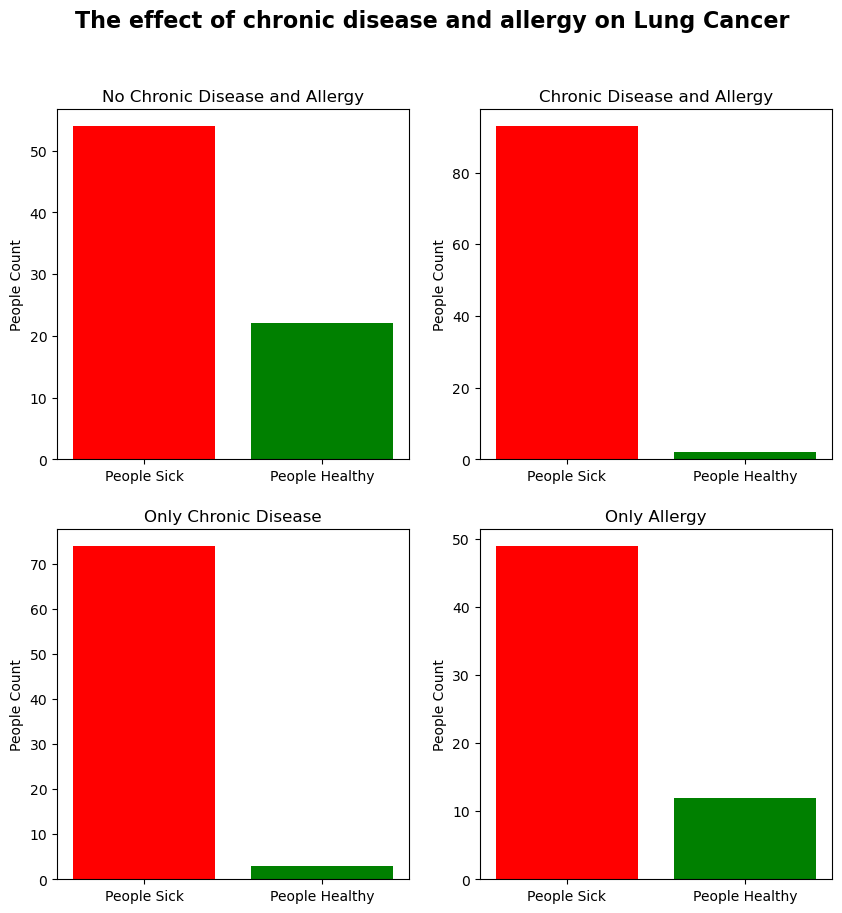

In [698]:
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,10)) 

bar = ax[0, 0].bar(['People Sick', 'People Healthy'], [result_df['PEOPLE SICK COUNT'][0], result_df['PEOPLE HEALTHY COUNT'][0]], color=['red','green'])

ax[0,0].set(title = "No Chronic Disease and Allergy",
       ylabel = "People Count");

bar2 = ax[0, 1].bar(['People Sick', 'People Healthy'], [result_df['PEOPLE SICK COUNT'][3], result_df['PEOPLE HEALTHY COUNT'][3]], color=['red','green'])

ax[0,1].set(title = "Chronic Disease and Allergy",
       ylabel = "People Count");

bar3 = ax[1, 0].bar(['People Sick', 'People Healthy'], [result_df['PEOPLE SICK COUNT'][1], result_df['PEOPLE HEALTHY COUNT'][1]], color=['red','green'])

ax[1,0].set(title = "Only Chronic Disease",
       ylabel = "People Count");

bar4 = ax[1,1].bar(['People Sick', 'People Healthy'], [result_df['PEOPLE SICK COUNT'][2], result_df['PEOPLE HEALTHY COUNT'][2]], color=['red','green'])

ax[1,1].set(title = "Only Allergy",
       ylabel = "People Count");


#add a title to a figure
fig.suptitle("The effect of chronic disease and allergy on Lung Cancer", fontsize=16, fontweight="bold");

In [699]:
fig.savefig("effect-of-chronic-disease-and-allergy.png")

In [700]:
cancer_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,NO,NO,NO,YES,YES,YES,NO,NO,YES,YES,YES,YES,NO,YES
305,M,70,YES,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,NO,YES,YES
306,M,58,YES,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,NO,YES,YES
307,M,67,YES,NO,YES,NO,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES


In [701]:
#symptoms of lung cancer
count_symptoms_yes = cancer_yes[["YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", 
                                          "FATIGUE ", "WHEEZING", "COUGHING", 
                                          "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", 
                                          "CHEST PAIN"]].apply(lambda x: x.value_counts())
count_symptoms_no = cancer_no[["YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", 
                                          "FATIGUE ", "WHEEZING", "COUGHING", 
                                          "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", 
                                          "CHEST PAIN"]].apply(lambda x: x.value_counts())

In [702]:
count_symptoms_no

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
NO,26,27,29,20,30,29,17,34,27
YES,13,12,10,19,9,10,22,5,12


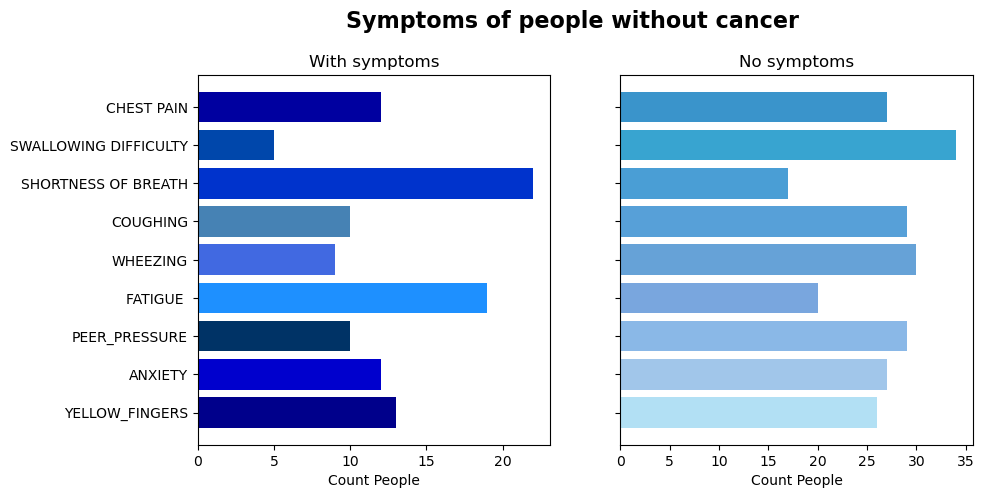

In [703]:
fig, ax = plt.subplots(nrows=1,
                      ncols=2,
                      figsize=(10,5),
                      sharey=True) 
dark_blue_shades = ['#00008b', '#0000cd', '#003366', '#1e90ff','#4169e1', '#4682b4', '#0033cc', '#0047ab','#0000a0']
pastel_blue_shades = ['#b2e0f4', '#a1c6ea', '#8ab8e7', '#79a6de', '#66a2d7', '#57a0d8', '#4a9ed5', '#38a4d0', '#3a94cb']

barh1 = ax[0].barh(count_symptoms_no.columns, count_symptoms_no.values[1], color=dark_blue_shades)
ax[0].set(title="With symptoms", xlabel = "Count People");

barh1 = ax[1].barh(count_symptoms_no.columns, count_symptoms_no.values[0], color=pastel_blue_shades)
ax[1].set(title="No symptoms", xlabel = "Count People");

fig.suptitle("Symptoms of people without cancer", fontsize=16, fontweight="bold");
plt.subplots_adjust(top=0.85) 

In [704]:
fig.savefig("symptoms-of-people-without-cancer.png")

In [705]:
count_symptoms_yes

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
YES,163,142,145,189,163,169,176,140,160
NO,107,128,125,81,107,101,94,130,110


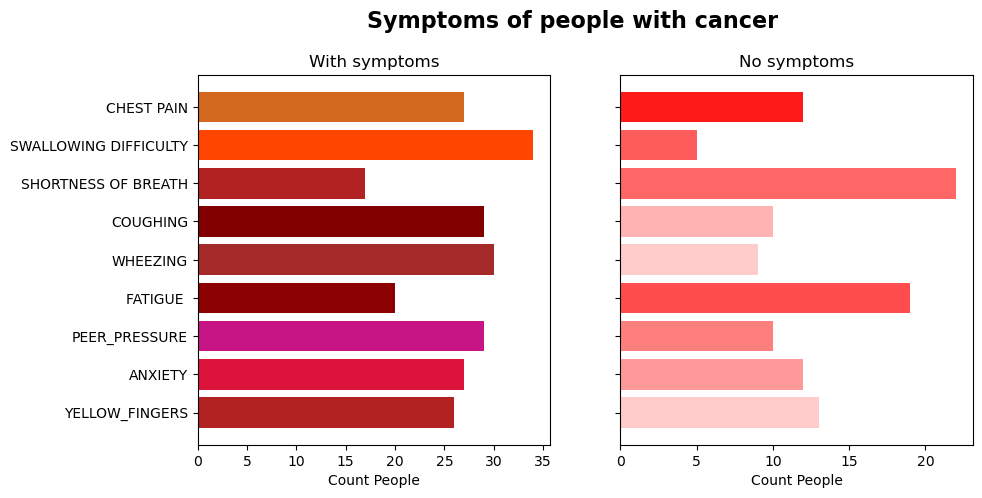

In [706]:
fig, ax = plt.subplots(nrows=1,
                      ncols=2,
                      figsize=(10,5),
                      sharey=True) 

pastel_red_shades = ['#ffcccb',  '#ff9999', '#ff7f7f',  '#ff4d4d','#ffcccc',  '#ffb3b3','#ff6666', '#ff5c5c', '#ff1a1a']
dark_red_shades = ['#b22222','#dc143c','#c71585', '#8b0000', '#a52a2a', '#800000', '#b22222', '#ff4500','#d2691e']

barh1 = ax[0].barh(count_symptoms_yes.columns, count_symptoms_no.values[0], color=dark_red_shades)
ax[0].set(title="With symptoms", xlabel = "Count People");

barh1 = ax[1].barh(count_symptoms_yes.columns, count_symptoms_no.values[1], color=pastel_red_shades)
ax[1].set(title="No symptoms", xlabel = "Count People");

fig.suptitle("Symptoms of people with cancer", fontsize=16, fontweight="bold");
plt.subplots_adjust(top=0.85) 

In [707]:
fig.savefig("symptoms-of-people-with-cancer.png")

In [708]:
#Checking if Age or Gender have an inpact
cancer_no.groupby(['GENDER', "AGE"]).count()

SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
GENDER AGE                                                                     
F      21         1               1        1              1                1   
       55         1               1        1              1                1   
       56         1               1        1              1                1   
       57         3               3        3              3                3   
       58         1               1        1              1                1   
       59         2               2        2              2                2   
       60         2               2        2              2                2   
       61         1               1        1              1                1   
       62         1               1        1              1                1   
       63         3               3        3              3                3   
       64         1               1        1              1                1   
       67         1               1        1              1                1   
       68         1               1        1              1                1   
       70         1               1        1              1                1   
       71         1               1        1              1                1   
       87         1               1        1              1                1   
M      46         1               1        1              1                1   
       47         1               1        1              1                1   
       55         2               2        2              2                2   
       56         1               1        1              1                1   
       59         2               2        2              2                2   
       60         1               1        1              1                1   
       61         1               1        1              1                1   
       63         2               2        2              2                2   
       64         1               1        1              1                1   
       68         2               2        2              2                2   
       69         3               3        3              3                3   

            FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER AGE                                                              
F      21          1         1         1                  1         1   
       55          1         1         1                  1         1   
       56          1         1         1                  1         1   
       57          3         3         3                  3         3   
       58          1         1         1                  1         1   
       59          2         2         2                  2         2   
       60          2         2         2                  2         2   
       61          1         1         1                  1         1   
       62          1         1         1                  1         1   
       63          3         3         3                  3         3   
       64          1         1         1                  1         1   
       67          1         1         1                  1         1   
       68          1         1         1                  1         1   
       70          1         1         1                  1         1   
       71          1         1         1                  1         1   
       87          1         1         1                  1         1   
M      46          1         1         1                  1         1   
       47          1         1         1                  1         1   
       55          2         2         2                  2         2   
       56          1         1         1                  1         1   
       59          2         2         2                  2         2   
       60   

In [740]:
cancer_no.loc[:, "AGE BRACKETS"] = cancer_no["AGE"].apply(
    lambda age: "YOUNG" if age <= 30 else ("MIDDLE" if age < 60 else "OLD")
)
cancer_yes.loc[:, "AGE BRACKETS"] = cancer_yes["AGE"].apply(
    lambda age: "YOUNG" if age <= 30 else ("MIDDLE" if age < 60 else "OLD")
)

In [710]:
result = cancer_no.groupby(["AGE BRACKETS", "GENDER"]).size().reset_index(name='PEOPLE HEALTHY COUNT')
result2 = cancer_yes.groupby(["AGE BRACKETS", "GENDER"]).size().reset_index(name='PEOPLE SICK COUNT')
result_df = result.merge(result2, on=["AGE BRACKETS", "GENDER"], how='outer')
result_df['PEOPLE SICK COUNT'] = result_df['PEOPLE SICK COUNT'].fillna(0)

In [711]:
result_df

,AGE BRACKETS,GENDER,PEOPLE HEALTHY COUNT,PEOPLE SICK COUNT
0,MIDDLE,F,8,45.0
1,MIDDLE,M,7,45.0
2,OLD,F,13,80.0
3,OLD,M,10,100.0
4,YOUNG,F,1,0.0


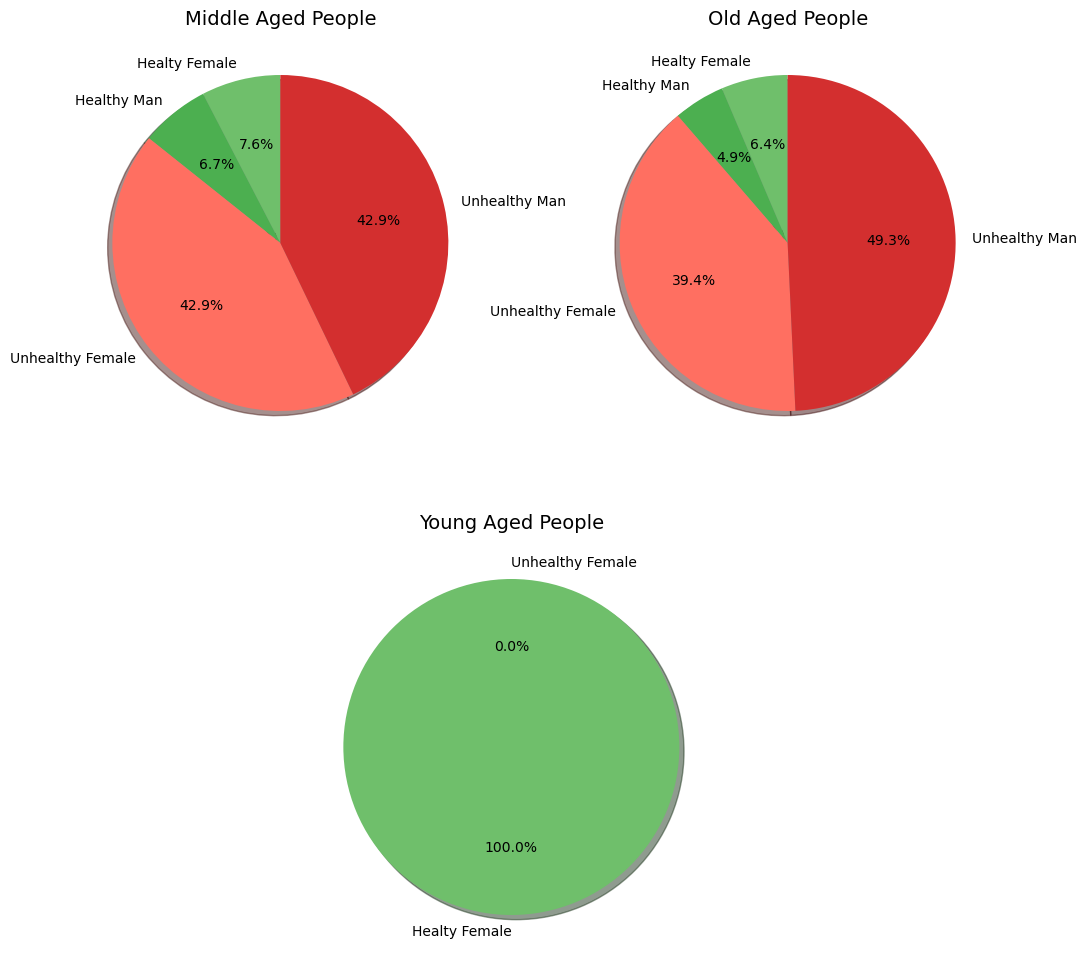

In [742]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(12, 12))

labels = ["Healty Female", "Healthy Man", "Unhealthy Female", "Unhealthy Man"]
sizes = [result_df['PEOPLE HEALTHY COUNT'][0], result_df['PEOPLE HEALTHY COUNT'][1], result_df['PEOPLE SICK COUNT'][0],result_df['PEOPLE SICK COUNT'][1]] 
colors = ['#6fbf6b', '#4caf50', '#ff6f61', '#d32f2f']

pie1 = ax[0,0].pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

ax[0,0].set_title("Middle Aged People", fontsize=14);

sizes = [result_df['PEOPLE HEALTHY COUNT'][2], result_df['PEOPLE HEALTHY COUNT'][3], result_df['PEOPLE SICK COUNT'][2],result_df['PEOPLE SICK COUNT'][3]] 
pie2 = ax[0,1].pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

ax[0,1].set_title("Old Aged People", fontsize=14);

sizes = [result_df['PEOPLE HEALTHY COUNT'][4],result_df['PEOPLE SICK COUNT'][4]] 
labels = ["Healty Female", "Unhealthy Female"]
colors = ['#6fbf6b', '#ff6f61']
pie3 = ax[1,0].pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

ax[1,0].set_title("Young Aged People", fontsize=14, x=6);
ax[1,0].set_xlim(left=1.5)
ax[1, 1].axis('off');

In [713]:
fig.savefig("age-gender-inpact.png")